In [3]:
# Basic Libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import pydot
import seaborn as sns

#Evaluation library
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Deep Learning libraries
import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from keras.layers.core import Dense,Activation,Dropout
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
#!pip install tensorflow==2.12.0

In [4]:
#Digit MNIST dataset
(X_train_digit, y_train_digit), (X_test_digit, y_test_digit) = mnist.load_data()

11490434/11490434 [==============================] - 3s 0us/step


<function matplotlib.pyplot.show(close=None, block=None)>

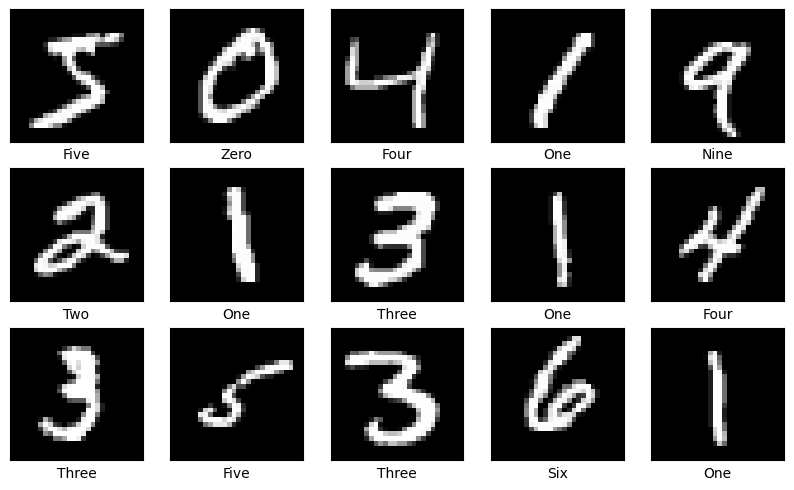

In [5]:
#Names of numbers in the dataset in order
col_names=['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

#Visualizing the digits
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train_digit[i],cmap='gray')
    plt.xlabel(col_names[y_train_digit[i]])
plt.show


In [6]:
X_train_digit.shape

(60000, 28, 28)

In [7]:
X_train_digit = X_train_digit.reshape(60000, 784)
X_test_digit = X_test_digit.reshape(10000, 784)

In [8]:
X_train_digit.shape

(60000, 784)

In [10]:
y_test_digit.shape

(10000,)

In [11]:
#Encoding Digit MNIST Labels
y_train_digit = to_categorical(y_train_digit, num_classes=10)

y_test_digit = to_categorical(y_test_digit, num_classes=10)

In [12]:
y_train_digit[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [17]:
#Creating base neural network
model=keras.Sequential([
    layers.Dense(256,activation='relu',input_shape=(784,)),
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    layers.Dense(10,activation='sigmoid'),
])

In [18]:
#param_number = output_channel_number * (input_channel_number + 1)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 256)               200960    
                                                                 
 dense_5 (Dense)             (None, 64)                16448     
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 10)                650       
                                                                 
Total params: 222,218
Trainable params: 222,218
Non-trainable params: 0
_________________________________________________________________


In [19]:
#Compiling the model
model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics = ['accuracy']
)

In [20]:
history=model.fit(X_train_digit, y_train_digit, batch_size=100, epochs=10,validation_data=(X_test_digit, y_test_digit))

Epoch 1/10
600/600 [==============================] - 5s 7ms/step - loss: 1.4780 - accuracy: 0.8571 - val_loss: 0.3836 - val_accuracy: 0.9121
Epoch 2/10
600/600 [==============================] - 3s 6ms/step - loss: 0.2556 - accuracy: 0.9344 - val_loss: 0.2697 - val_accuracy: 0.9407
Epoch 3/10
600/600 [==============================] - 3s 4ms/step - loss: 0.1801 - accuracy: 0.9515 - val_loss: 0.2327 - val_accuracy: 0.9463
Epoch 4/10
600/600 [==============================] - 3s 5ms/step - loss: 0.1403 - accuracy: 0.9597 - val_loss: 0.2247 - val_accuracy: 0.9480
Epoch 5/10
600/600 [==============================] - 3s 4ms/step - loss: 0.1183 - accuracy: 0.9659 - val_loss: 0.1894 - val_accuracy: 0.9545
Epoch 6/10
600/600 [==============================] - 2s 4ms/step - loss: 0.1122 - accuracy: 0.9678 - val_loss: 0.1757 - val_accuracy: 0.9570
Epoch 7/10
600/600 [==============================] - 2s 4ms/step - loss: 0.1005 - accuracy: 0.9705 - val_loss: 0.1588 - val_accuracy: 0.9615
Epoch 

In [22]:
#Predicting the labels-DIGIT
y_predict = model.predict(X_test_digit)
y_predict[0]

313/313 [==============================] - 1s 2ms/step


array([3.1034839e-01, 4.3652609e-01, 9.8914915e-01, 6.7602414e-01,
       4.1687247e-04, 2.4921823e-02, 1.3572992e-02, 9.9999958e-01,
       2.3844053e-01, 3.3734558e-04], dtype=float32)

In [23]:
# Here we get the index of maximum value in the encoded vector
y_predicts=np.argmax(y_predict, axis=1)
y_predicts

array([7, 1, 1, ..., 4, 5, 6], dtype=int64)

In [25]:
y_test_digit_eval=np.argmax(y_test_digit, axis=1)
y_test_digit_eval

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

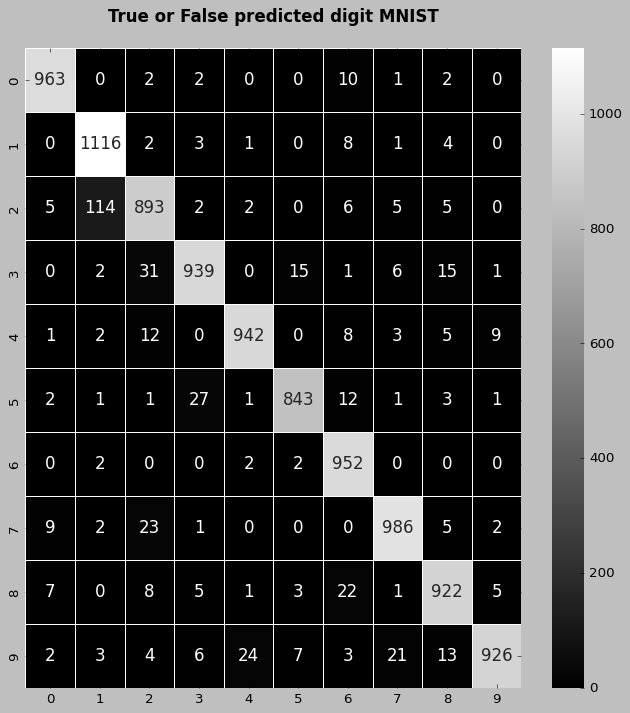

In [29]:
#Confusion matrix for Digit MNIST
con_mat=confusion_matrix(y_test_digit_eval,y_predicts)
plt.style.use('classic')
plt.figure(figsize=(10,10))
sns.heatmap(con_mat,annot=True,annot_kws={'size': 15},linewidths=0.5,fmt="d",cmap="gray")
plt.title('True or False predicted digit MNIST\n',fontweight='bold',fontsize=15)
plt.show()

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test_digit_eval,y_predicts))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       980
           1       0.90      0.98      0.94      1135
           2       0.91      0.87      0.89      1032
           3       0.95      0.93      0.94      1010
           4       0.97      0.96      0.96       982
           5       0.97      0.95      0.96       892
           6       0.93      0.99      0.96       958
           7       0.96      0.96      0.96      1028
           8       0.95      0.95      0.95       974
           9       0.98      0.92      0.95      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



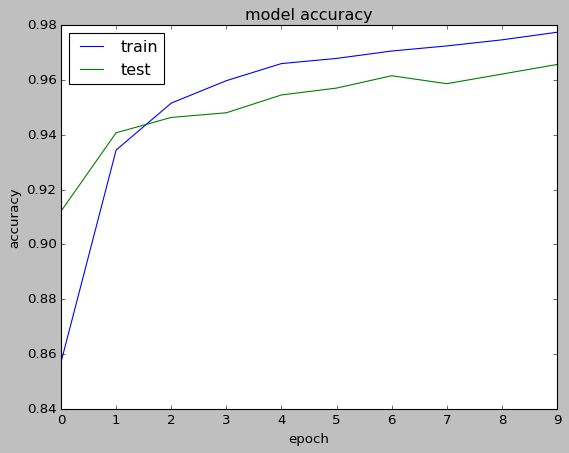

In [31]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

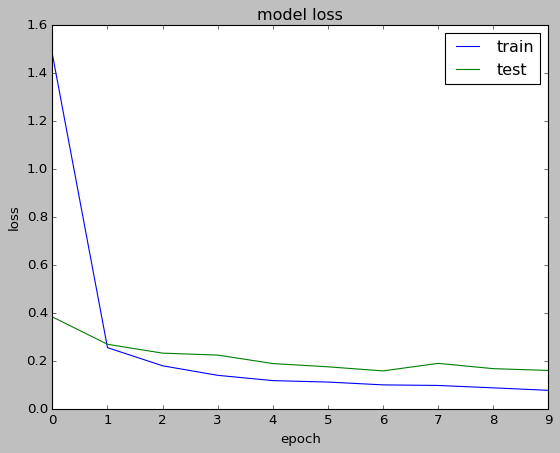

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [33]:
#tf.expand_dims(X_test_digit[0])
y_predict_single = model.predict(X_test_digit[[2]])
y_predicts_single=np.argmax(y_predict_single, axis=1) # Here we get the index of maximum value in the encoded vector
y_test_digit_eval=np.argmax(y_test_digit, axis=1)

1/1 [==============================] - 0s 31ms/step


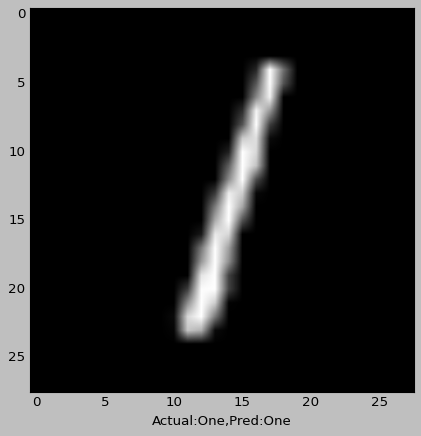

In [34]:
#Names of numbers in the dataset in order
col_names = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

#Visualizing the digits
#plt.figure(figsize=(10,10))
plt.imshow(X_test_digit[2].reshape(28,28), cmap='gray')
plt.xlabel("Actual:{},Pred:{}".format(col_names[np.argmax(y_test_digit[2])],col_names[y_predicts_single[0]]))
plt.show()